##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

### Zadanie 1 dla Scores.csv

In [1]:
from IPython.core.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.style.use('ggplot')

df = pd.read_csv('SCORES.csv')
display(df.head())
display(df.describe())
df.shape

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


(25, 2)

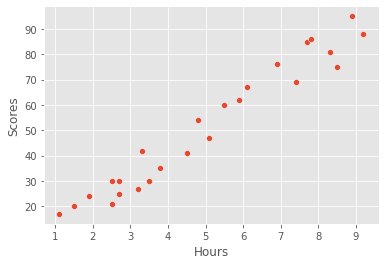

In [2]:
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.show()

Intercept: [2.79419668]
Coef: [[9.71054094]]


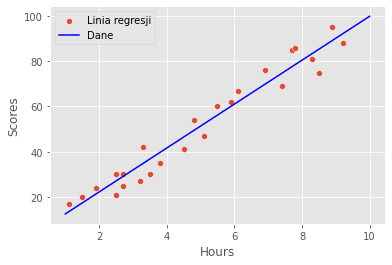

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[['Hours']], df[['Scores']], test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

intercept = reg.intercept_
coef = reg.coef_
print(f'Intercept: {intercept}\nCoef: {coef}')
sns.scatterplot(x='Hours', y='Scores', data=df)
reg_line = lambda x: coef[0][0]*x + intercept[0]
plt.plot([1, 10], [reg_line(1), reg_line(10)], 'b')
plt.legend(['Linia regresji', 'Dane'])
plt.show()

In [4]:
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Średni błąd bezwzględny: {mae}')
print(f'Błąd średniokwadratowy: {mse}')
print(f'Pierwiastek błędu średniokwadratowego: {rmse}')
print(f'Score: {reg.score(X_train, y_train)}')

Średni błąd bezwzględny: 4.499999999999998
Błąd średniokwadratowy: 23.61945761415174
Pierwiastek błędu średniokwadratowego: 4.859985351228103
Score: 0.9536486503889446


### Zadanie 1 dla SBP.csv

In [5]:
df = pd.read_csv('SBP.csv')
display(df.head())
display(df.describe())
df.shape

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132


,Age,SBP
count,19.000000,19.000000
mean,64.947368,129.421053
std,7.214751,13.454928
min,54.000000,111.000000
25%,60.500000,119.000000
50%,63.000000,129.000000
75%,68.500000,137.000000
max,79.000000,163.000000


(19, 2)

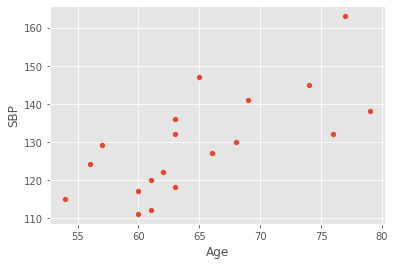

In [6]:
sns.scatterplot(x='Age', y='SBP', data=df)
plt.show()

Intercept: [36.17936475]
Coef: [[1.44882707]]


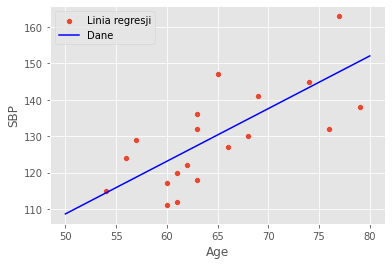

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df[['SBP']], test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

intercept = reg.intercept_
coef = reg.coef_
print(f'Intercept: {intercept}\nCoef: {coef}')
sns.scatterplot(x='Age', y='SBP', data=df)
reg_line = lambda x: coef[0][0]*x + intercept[0]
plt.plot([50, 80], [reg_line(50), reg_line(80)], 'b')
plt.legend(['Linia regresji', 'Dane'])
plt.show()

In [8]:
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Średni błąd bezwzględny: {mae}')
print(f'Błąd średniokwadratowy: {mse}')
print(f'Pierwiastek błędu średniokwadratowego: {rmse}')
print(f'Score: {reg.score(X_train, y_train)}')

Średni błąd bezwzględny: 7.175454985814118
Błąd średniokwadratowy: 63.48947834957039
Pierwiastek błędu średniokwadratowego: 7.968028510840708
Score: 0.5494410762946278


W przypadku danych SBP model liniowy nie opisuje już tak dokładnie naszego zbioru danych jak w przypadku danych SCORES.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [9]:
df = pd.read_csv('PETROL.csv')
df.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


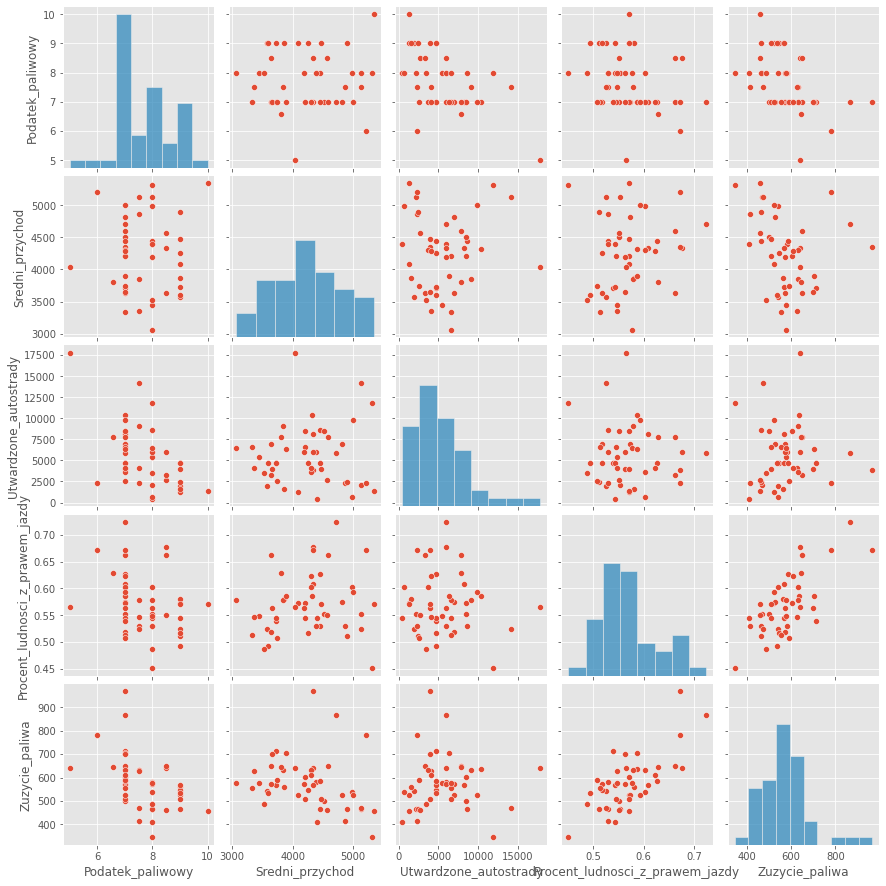

Intercept: [513.1398382]
Coef: [[-3.99336011e+01 -4.53815410e-02 -4.95597538e-03  1.03711642e+03]]


In [10]:
sns.pairplot(df)
plt.show()

y = df[['Zuzycie_paliwa']]
X = df[['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
intercept = reg.intercept_
coef = reg.coef_
print(f'Intercept: {intercept}\nCoef: {coef}')

In [11]:
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Średni błąd bezwzględny: {mae}')
print(f'Błąd średniokwadratowy: {mse}')
print(f'Pierwiastek błędu średniokwadratowego: {rmse}')
print(f'Score: {reg.score(X_train, y_train)}')

Średni błąd bezwzględny: 63.02652446557485
Błąd średniokwadratowy: 8076.669020354741
Pierwiastek błędu średniokwadratowego: 89.8702899759133
Score: 0.6901809459027917


Wskaźniki średniego błędu bezwzględnego, średniokwadratowego oraz pierwiastek błędu średniokwadratowego są gorsze, niż w przypadkach regresji liniowej na zbiorach SBP i Scores. Jednakże jeżeli weźmie się pod uwagę współczynnik determinacji(wartość zwracana przez metodę score klasy LinearRegression) to można ocenić, że model pasuje do danych lepiej, niż model stworzony dla danych SBP. Niestety nieco odbiega skutecznością od modelu danych Scores prawdopodobnie przez szum występujący w relacji utwardzonych autostrad i zużycia paliwa. Trend zaburzony jest nieco również w przypadkach relacji 'Średni przychód' - 'Zużycie paliwa' oraz 'Podatek paliwowy' - 'Zużycie paliwa'.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df = pd.read_csv('HEART.csv')
df = df.replace('?', np.nan)
display(df.head())
display(df.describe())
display(df.info())
df.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0


,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    object 
 4   chol        271 non-null    object 
 5   fbs         286 non-null    object 
 6   restecg     293 non-null    object 
 7   thalach     293 non-null    object 
 8   exang       293 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       104 non-null    object 
 11  ca          3 non-null      object 
 12  thal        28 non-null     object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


None

(294, 14)

In [13]:
df = df.drop(labels=['ca', 'slope', 'thal'], axis=1).dropna()
display(df.head())
display(df.describe())
display(df.info())
df.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0


,age,sex,cp,oldpeak,num
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,47.770115,0.735632,3.003831,0.612261,0.375479
std,7.842244,0.441843,0.970718,0.931914,0.485177
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,65.000000,1.000000,4.000000,5.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         261 non-null    int64  
 1   sex         261 non-null    int64  
 2   cp          261 non-null    int64  
 3   trestbps    261 non-null    object 
 4   chol        261 non-null    object 
 5   fbs         261 non-null    object 
 6   restecg     261 non-null    object 
 7   thalach     261 non-null    object 
 8   exang       261 non-null    object 
 9   oldpeak     261 non-null    float64
 10  num         261 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 24.5+ KB


None

(261, 11)

In [14]:
df = pd.get_dummies(df, columns=['cp', 'restecg'])

In [15]:
X = df.drop('num       ', axis=1)
y = df['num       ']

In [16]:
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# przeskalowanie danych
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.73      0.80      0.76        20

    accuracy                           0.81        53
   macro avg       0.80      0.81      0.80        53
weighted avg       0.82      0.81      0.81        53

